# importing lab              

In [1]:
'''image data generator tries to generate multiple data from 
single image like by shrinking,zooming/croping etc.'''
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential #we are using sequential model for classification.
'''Conv is used to exract featurs from images 
max pooling reduce the size of image without loosing it's feature  '''
from keras.layers import Conv2D, MaxPooling2D 
'''Activation function used to tell the network when to activate neuron
by using Dropout our network doesn't overfit
Flatten convert 2d image  into 1d vector
Dense is used to create hidden and output layer'''  
from keras.layers import Activation, Dropout,Flatten,Dense
''' backend tells us which channel is come first '''
from keras import backend as k
import numpy as np
from keras_preprocessing import image 

Using TensorFlow backend.


# Diamensions of the image

In [2]:
img_width, img_height =500,500
train_data_dir ='train/Train2'
test_data_dir ='test1/Test1'
nb_train_samples= 25000
nb_test_saples =100
epochs= 50
batch_size =20 



In [3]:
%pwd

'C:\\Users\\hp\\cats vs dogs'

In [4]:
#chech images are in right format or not
if k.image_data_format() == 'channels_first':
    input_shape = (3,img_width,img_height)
else:
    input_shape = (img_width,img_height,3)

train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale =1.0/255.0)

In [5]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

test_generator = test_datagen.flow_from_directory(train_data_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size,
                                                   class_mode='binary')



Found 25000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [6]:
model =Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()


model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 498, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 498, 498, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 249, 249, 32)      0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 498, 498, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 498, 498, 32)      0         
__________________________________

In [7]:
model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_samples // batch_size,
                   epochs=epochs,
                   validation_data=test_generator,
                   validation_steps=nb_test_saples// batch_size)
model.save_weights('first_try.h5')



Epoch 1/50
50/50 [==============================] - 219s 4s/step - loss: 1.0565 - accuracy: 0.5340 - val_loss: 0.6713 - val_accuracy: 0.6300
Epoch 2/50
50/50 [==============================] - 228s 5s/step - loss: 0.7415 - accuracy: 0.5750 - val_loss: 0.6874 - val_accuracy: 0.5300
Epoch 3/50
50/50 [==============================] - 216s 4s/step - loss: 0.7083 - accuracy: 0.5810 - val_loss: 0.6948 - val_accuracy: 0.5600
Epoch 4/50
50/50 [==============================] - 216s 4s/step - loss: 0.7004 - accuracy: 0.5800 - val_loss: 0.6521 - val_accuracy: 0.6500
Epoch 5/50
50/50 [==============================] - 216s 4s/step - loss: 0.7008 - accuracy: 0.6260 - val_loss: 0.5464 - val_accuracy: 0.6200
Epoch 6/50
50/50 [==============================] - 219s 4s/step - loss: 0.6710 - accuracy: 0.6150 - val_loss: 0.6181 - val_accuracy: 0.6500
Epoch 7/50
50/50 [==============================] - 216s 4s/step - loss: 0.6356 - accuracy: 0.6380 - val_loss: 0.6432 - val_accuracy: 0.5900
Epoch 8/50
50

In [12]:
import cv2
vidcap = cv2.VideoCapture('dogscats.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.2 #//it will capture image in each 0.2 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

In [13]:
img_pred =image.load_img('vid1/image102.jpg',target_size= (500,500))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

[[1.]]
dog


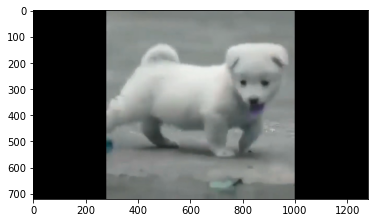

In [14]:
rslt =model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ='dog'
else:
    prediction ='cat'

print(prediction)
import matplotlib.pyplot as plt
img = cv2.imread('vid1/image102.jpg')
plt.imshow(img)
plt.show()

In [15]:
img_pred =image.load_img('vid1/image276.jpg',target_size= (500,500))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

[[2.6062375e-17]]
cat


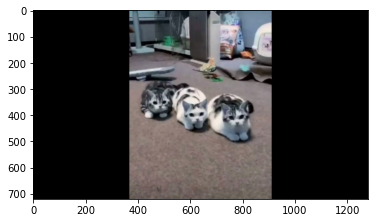

In [16]:
rslt =model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ='dog'
else:
    prediction ='cat'

print(prediction)
img = cv2.imread('vid1/image276.jpg')
plt.imshow(img)
plt.show()

In [10]:
img_pred =image.load_img('test1/Test1/dogs/2.jpg',target_size= (500,500))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

In [11]:
rslt =model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ='dog'
else:
    prediction ='cat'

print(prediction)

[[1.]]
dog
